___
### Perform Data Preprocessing and Feature Scaling on this data. 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/marketing_campaign.csv', sep='	')

In [5]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.count()

ID                     2240
Year_Birth             2240
Education              2240
Marital_Status         2240
Income                 2216
Kidhome                2240
Teenhome               2240
Dt_Customer            2240
Recency                2240
MntWines               2240
MntFruits              2240
MntMeatProducts        2240
MntFishProducts        2240
MntSweetProducts       2240
MntGoldProds           2240
NumDealsPurchases      2240
NumWebPurchases        2240
NumCatalogPurchases    2240
NumStorePurchases      2240
NumWebVisitsMonth      2240
AcceptedCmp3           2240
AcceptedCmp4           2240
AcceptedCmp5           2240
AcceptedCmp1           2240
AcceptedCmp2           2240
Complain               2240
Z_CostContact          2240
Z_Revenue              2240
Response               2240
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

___
- __A. Handle the missing values.__

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Income'].isnull().sum()

np.int64(0)

___
- __B. Drop the `Dt_Customer` column.__

In [11]:
df.shape

(2240, 29)

In [12]:
df.drop(columns = 'Dt_Customer', inplace=True)

- Dropping Id column aswell. 

In [13]:
df.drop(columns = 'ID', inplace=True)

In [14]:
df.shape

(2240, 27)

- Encoding using `get_dummies`

In [15]:
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
df_encoded.head(3)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,True,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,True,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,True,False,False,False,False,False,False,True,False,False


In [16]:
df_encoded.shape

(2240, 36)

- Scaling


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

___
### 2.  Apply the following clustering techniques:
    KMeans (Elbow method).
    KMedoids (Elbow Method)
    DBSCAN 

- __A. KMeans (Elbow method)__

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

- WCSS (within-cluster sum of squares)

In [19]:
wcss = []
K = range(1,29)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=8)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

- Elbow Plot

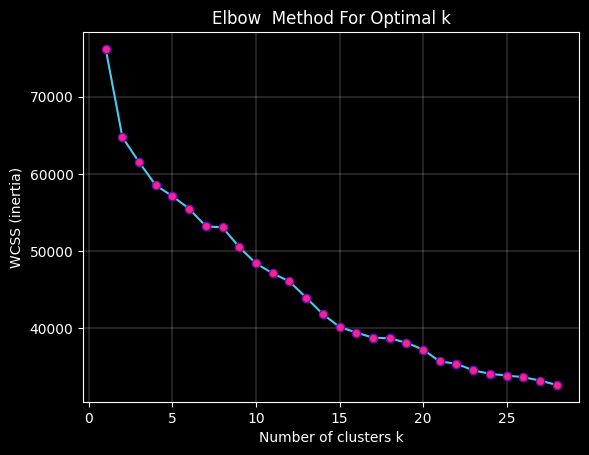

In [ ]:
plt.style.use('dark_background')
plt.plot(K, wcss, marker='o', mfc = '#f72585', mec = '#7209b7', color='#4cc9f0')
plt.grid (True, linewidth=0.2)
plt.xlabel('Number of clusters k')
plt.ylabel('WCSS (inertia)')
plt.title('Elbow  Method For Optimal k')
plt.show()

- Automatic elbow locator usinng kneed library

__How it works:__ The KneeLocator normalizes and smooths the curve, then finds where the slope changes most sharply, the “knee” or “elbow” point. It does this by detecting the maximum curvature in the data, controlled by a sensitivity parameter. The result (kl.knee or kl.elbow) gives the optimal point on the x-axis. 

In [39]:
from kneed import KneeLocator

kl = KneeLocator(K, wcss, curve='convex', direction='decreasing')
print("ELBOW IDENTIFIED IN K --> ", kl.elbow)

ELBOW IDENTIFIED IN K -->  15


___